In [84]:
from scipy.stats import skew
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('flight.csv')

| Code | Description |
| ----- | ----------|
| MEMBER_NO-b | ID Member |
| FFP_DATE | Frequent Flyer Program Join Date |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama |
| GENDER  | Jenis Kelamin |
| FFP_TIER | Tier dari Frequent Flyer Program |
| WORK_CITY  | Kota Asal |
| WORK_PROVINCE  | Provinsi Asal |
| WORK_COUNTRY  | Negara Asal |
| AGE  | Umur Customer |
| LOAD_TIME  | Tanggal data diambil  |
| FLIGHT_COUNT  | Jumlah penerbangan Customer |
| BP_SUM | Rencana Perjalanan |
| SUM_YR_1  | Fare Revenue |
| SUM_YR_2  | Votes Prices |
| SEG_KM_SUM | Total jarak(km) penerbangan yg sudah dilakukan |
| LAST_FLIGHT_DATE | Tanggal penerbangan terakhir |
| LAST_TO_END   | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| AVG_INTERVAL  | Rata-rata jarak waktu |
| MAX_INTERVAL  | Maksimal jarak waktu |
| EXCHANGE_COUNT | Jumlah penukaran |
| avg_discount  | Rata rata discount yang didapat customer |
| Points_Sum  | Jumlah poin yang didapat customer |
| Point_NotFlight  | point yang tidak digunakan oleh members |


In [3]:
df.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
df.shape

(62988, 23)

In [5]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [9]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [10]:
categorical = ['MEMBER_NO', 'FFP_DATE', 'FFP_TIER','FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
numerical = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
print(f'Categorical Data: {categorical}')
print(f'Numerical Data: {numerical}')

Categorical Data: ['MEMBER_NO', 'FFP_DATE', 'FFP_TIER', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Numerical Data: ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']


EDA

In [11]:
df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MEMBER_NO          62988 non-null  int64 
 1   FFP_DATE           62988 non-null  object
 2   FFP_TIER           62988 non-null  int64 
 3   FIRST_FLIGHT_DATE  62988 non-null  object
 4   GENDER             62985 non-null  object
 5   WORK_CITY          60719 non-null  object
 6   WORK_PROVINCE      59740 non-null  object
 7   WORK_COUNTRY       62962 non-null  object
 8   LOAD_TIME          62988 non-null  object
 9   LAST_FLIGHT_DATE   62988 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.8+ MB


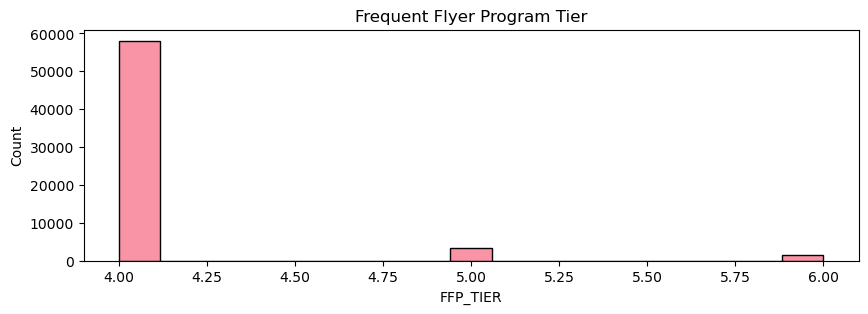

In [12]:
plt.figure(figsize=(10,3))
sns.set_palette("husl",8)

#FFP_TIER
sns.histplot(x='FFP_TIER', data=df)
plt.title('Frequent Flyer Program Tier')
plt.show()

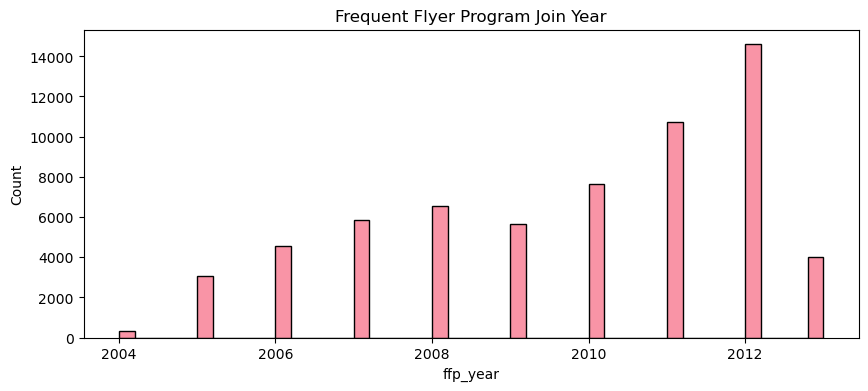

In [19]:
df1 = df.copy()

#reducing the Frequent Flyer program date to per year
df1['FFP_DATE'] = pd.to_datetime(df1['FFP_DATE'])
df1['ffp_year'] = df1['FFP_DATE'].dt.year

#FFP_DATE

plt.figure(figsize=(10,4))
sns.histplot(x='ffp_year', data=df1)
plt.title('Frequent Flyer Program Join Year')
plt.show()

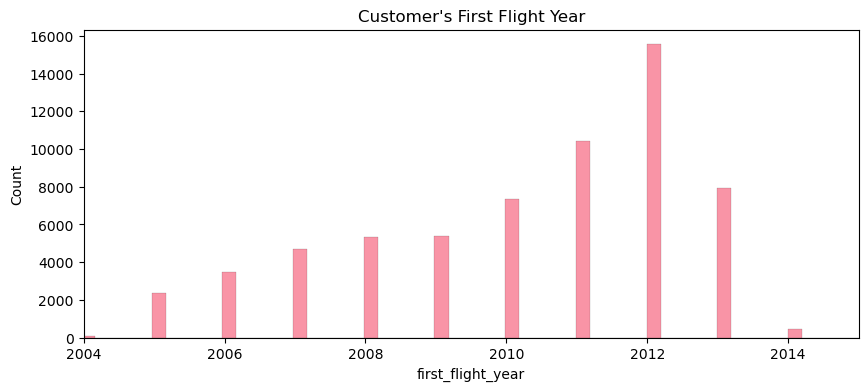

In [24]:
#reducing the first flight date to per year

df1['FIRST_FLIGHT_DATE'] = pd.to_datetime(df1['FIRST_FLIGHT_DATE'])
df1['first_flight_year'] = df1['FIRST_FLIGHT_DATE'].dt.year

#First flight year 

plt.figure(figsize=(10,4))
sns.histplot(x='first_flight_year', data=df1)
plt.title("Customer's First Flight Year")
plt.xlim(2004, 2015)
plt.show()


In [44]:
#INI KENAPA PL33333333333333rrrrrrrrrrrrrrrrrrrrrrrrrrr
plt.figure(figsize=(10,6))
sns.histplot(x='LAST_FLIGHT_DATA', data=df1)
plt.title('Last Flight Date')
plt.show()


ValueError: Could not interpret value `LAST_FLIGHT_DATA` for parameter `x`

<Figure size 1000x600 with 0 Axes>

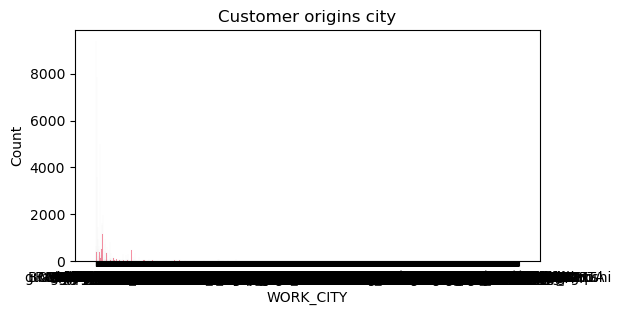

In [85]:
plt.figure(figsize=(6,3))
sns.histplot(x='WORK_CITY', data=df1)
plt.title('Customer origins city')
plt.show()

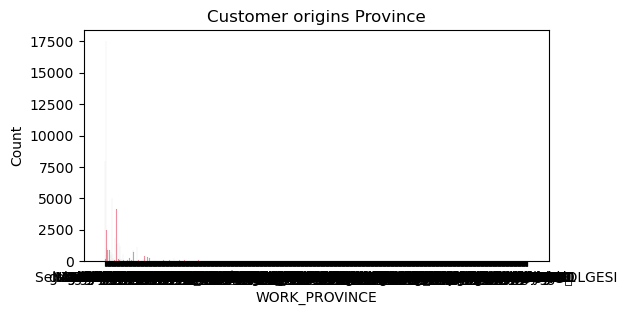

In [86]:
plt.figure(figsize=(6,3))
sns.histplot(x='WORK_PROVINCE', data=df1)
plt.title('Customer origins Province')
plt.show()

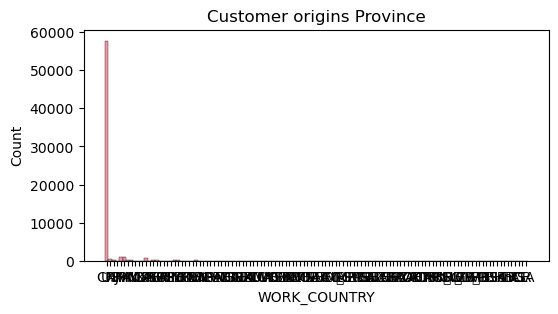

In [87]:
plt.figure(figsize=(6,3))
sns.histplot(x='WORK_COUNTRY', data=df1)
plt.title('Customer origins Province')
plt.show()

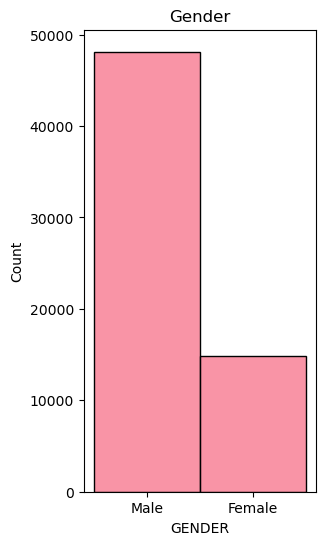

In [87]:
plt.figure(figsize=(3,6))

#GENDER

sns.histplot(x='GENDER', data= df1)
plt.title('Gender')
plt.show()

In [61]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              62568 non-null  float64
 1   FLIGHT_COUNT     62988 non-null  int64  
 2   BP_SUM           62988 non-null  int64  
 3   SUM_YR_1         62437 non-null  float64
 4   SUM_YR_2         62850 non-null  float64
 5   SEG_KM_SUM       62988 non-null  int64  
 6   LAST_TO_END      62988 non-null  int64  
 7   AVG_INTERVAL     62988 non-null  float64
 8   MAX_INTERVAL     62988 non-null  int64  
 9   EXCHANGE_COUNT   62988 non-null  int64  
 10  avg_discount     62988 non-null  float64
 11  Points_Sum       62988 non-null  int64  
 12  Point_NotFlight  62988 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.2 MB


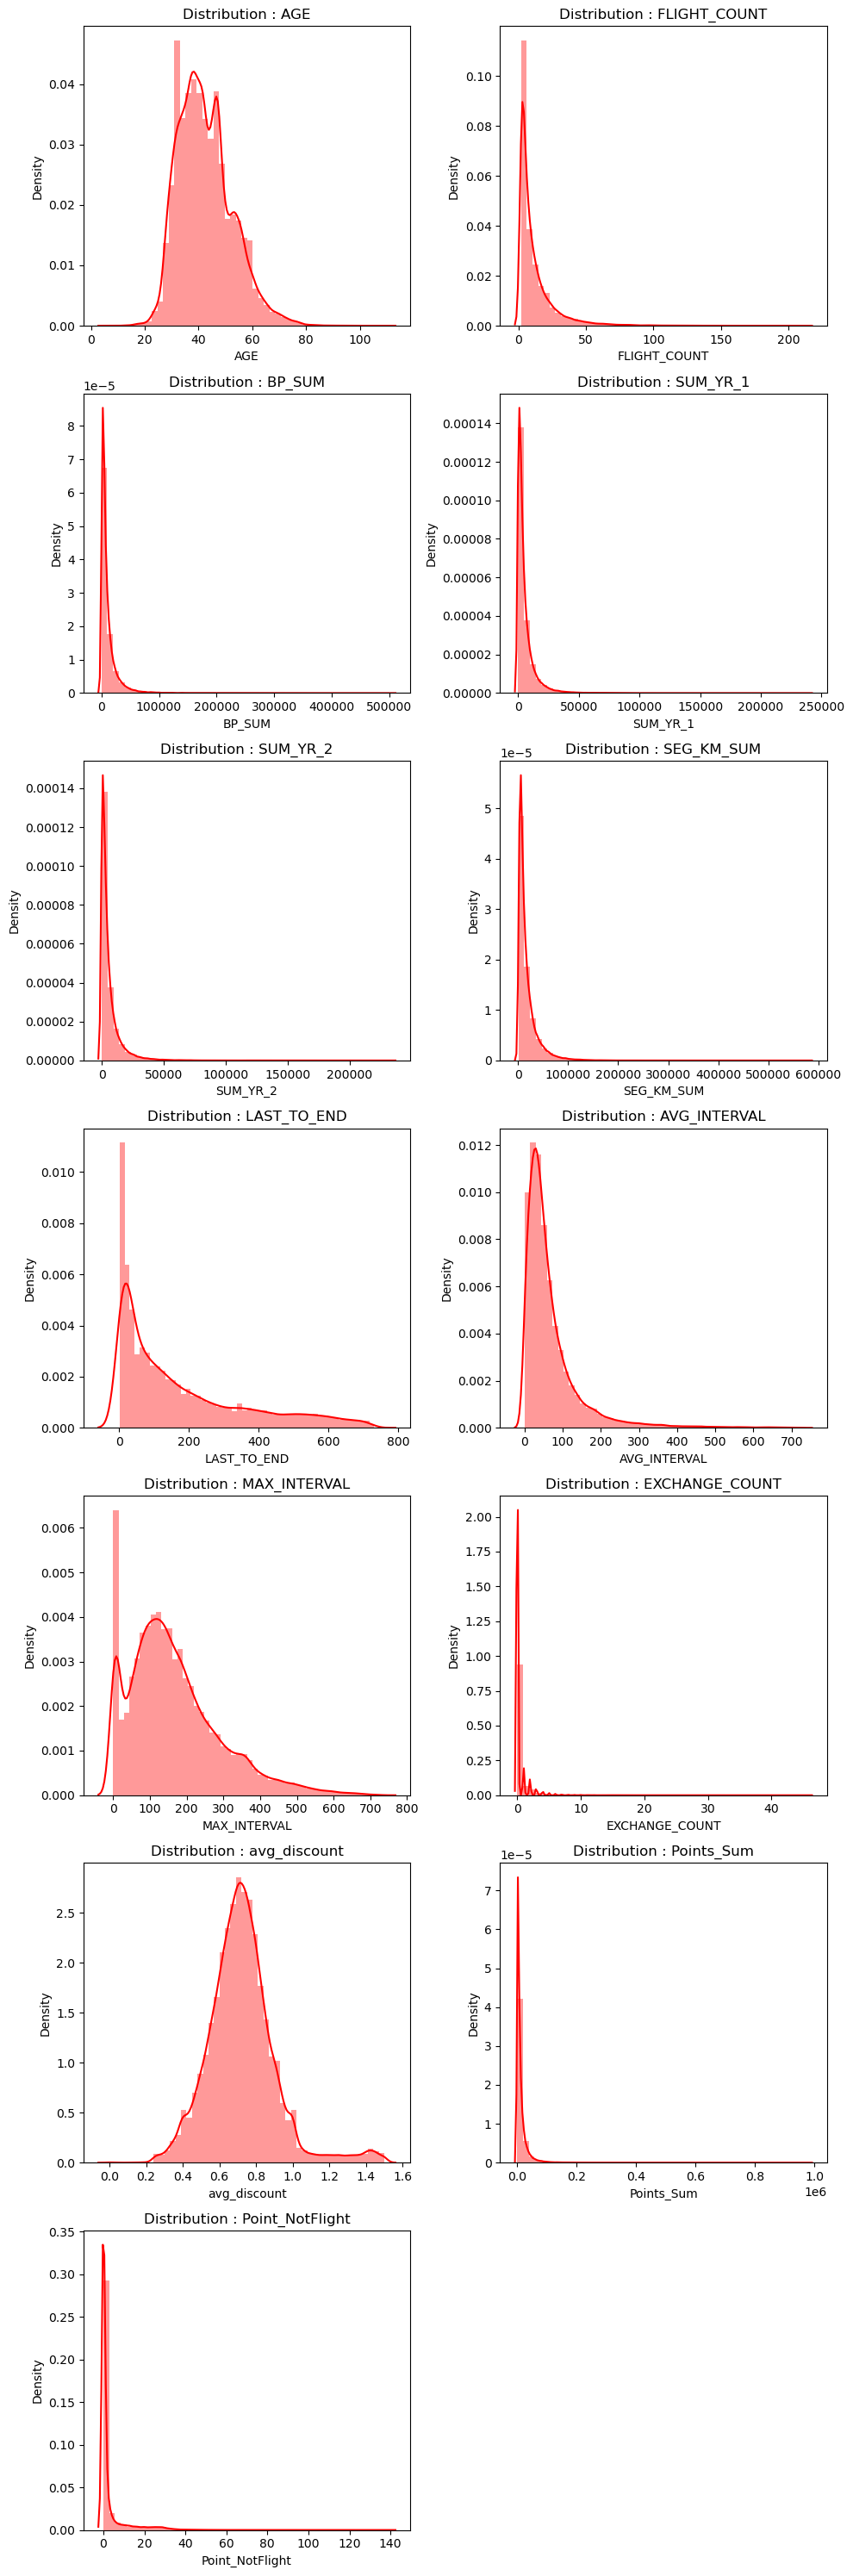

In [76]:
plt.figure(figsize=(10,30))
for i in range(len(numerical)):
    plt.subplot(7,2,i+1)
    sns.distplot(df[numerical[i]],color='red')
    title = 'Distribution : ' + numerical[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

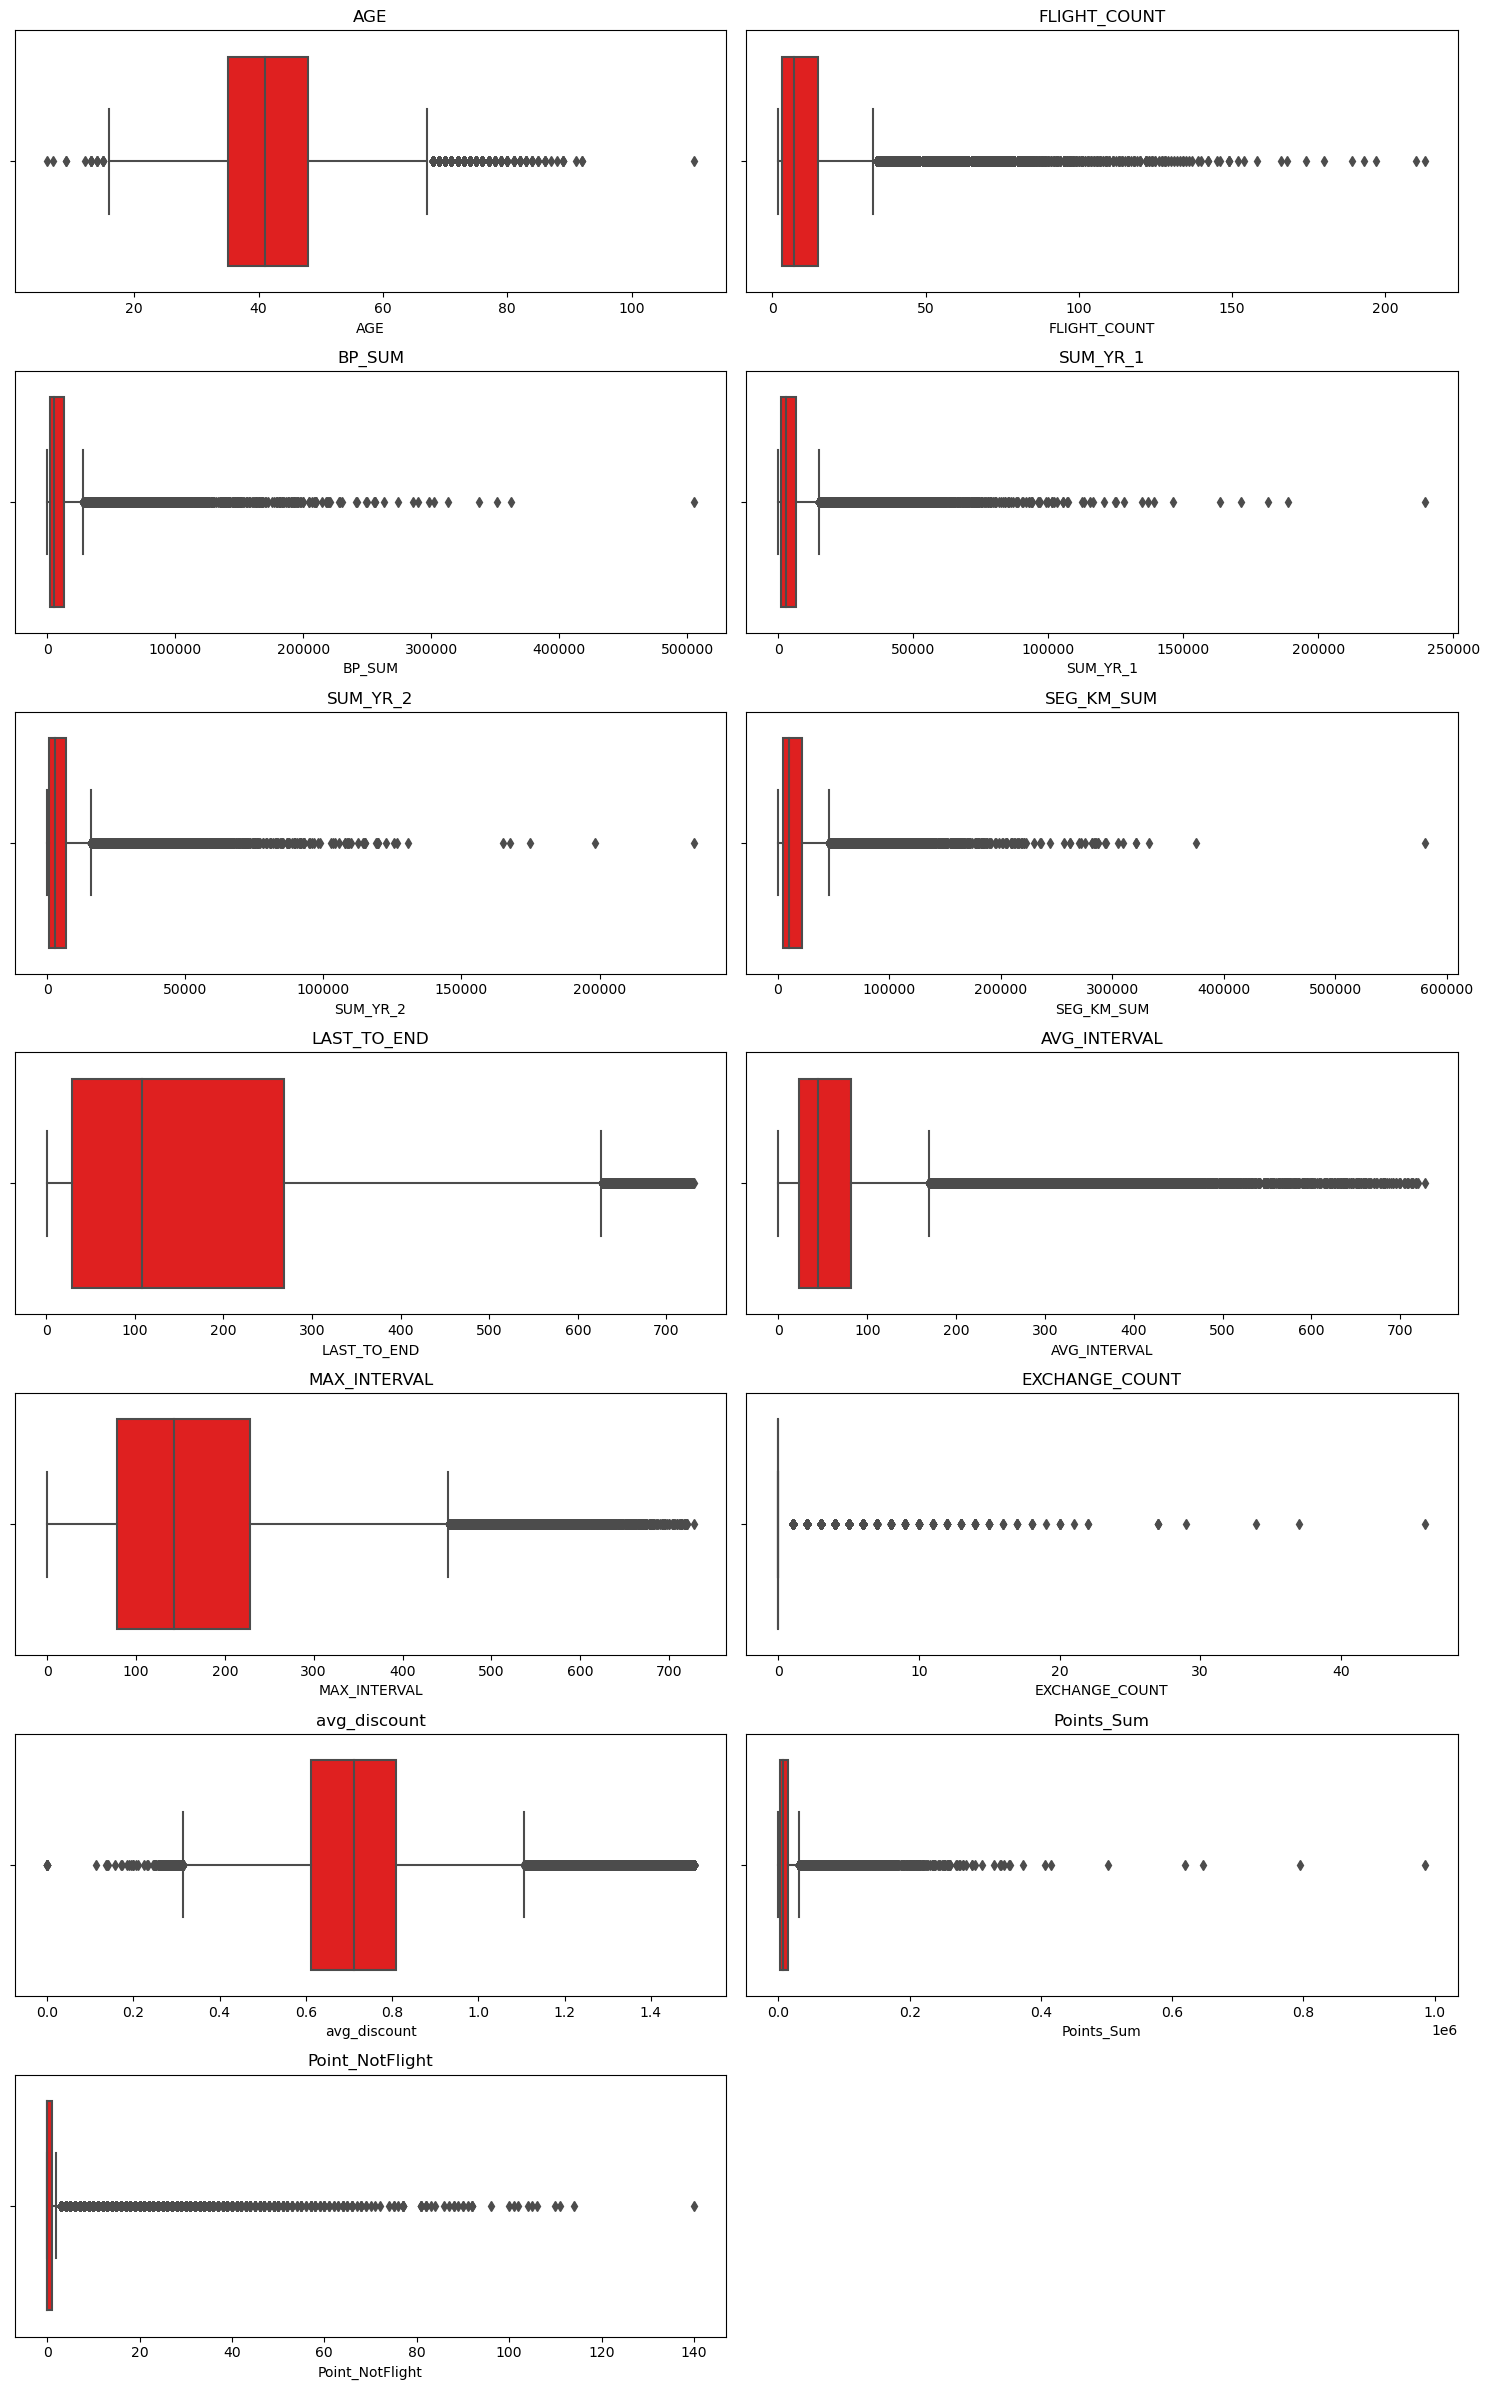

In [78]:
plt.figure(figsize=(15,24))
for i in range(len(numerical)):
    plt.subplot(7,2,i+1)
    sns.boxplot(df[numerical[i]],color ='red')
    plt.title(numerical[i])
    plt.tight_layout()
plt.show()

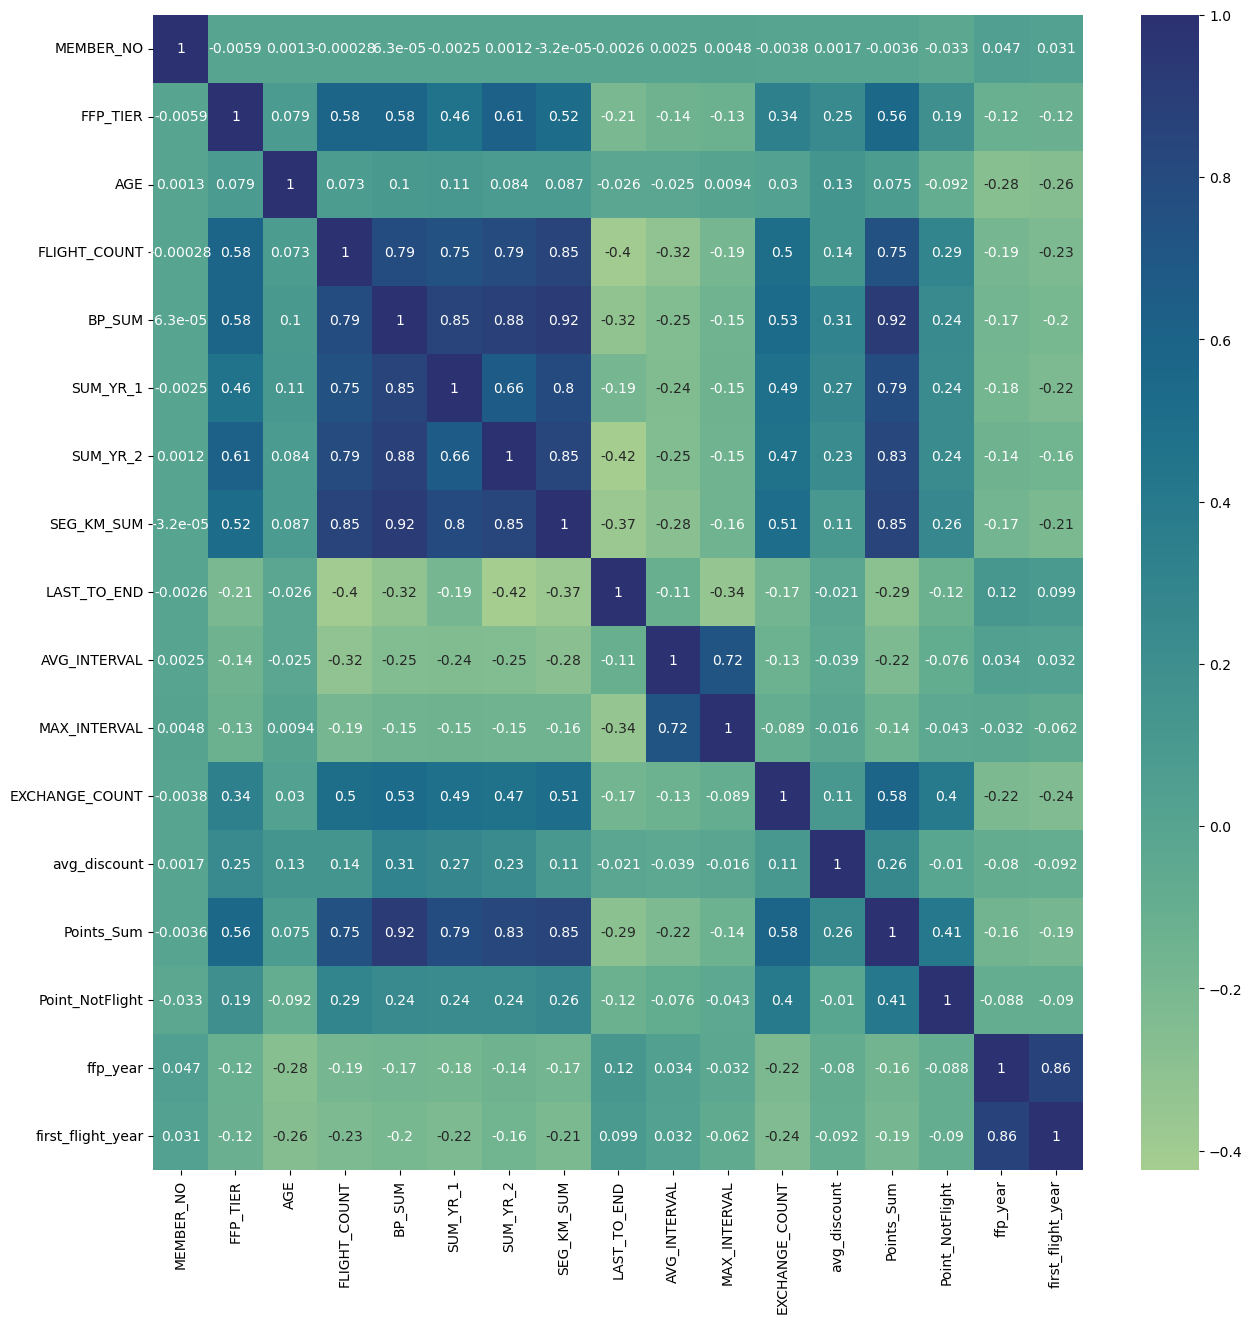

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), cmap='crest', annot=True)
plt.show()

banyak banget kontol

Cleanup

In [52]:
new_df = df.copy()

In [53]:
new_df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Fitur-fitur ini (`WORK_COUNTRY`, `AGE` , `SUM_YR_1`, `SUM_YR_2`, `GENDER`) hanya hilang dengan porsi yang sangat kecil, maka akan kita drop.

In [63]:
missing = new_df[['WORK_COUNTRY','AGE','SUM_YR_1','SUM_YR_2','GENDER']]
for i in missing:
    new_df.dropna(subset=[i], inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          61856 non-null  int64  
 1   FFP_DATE           61856 non-null  object 
 2   FIRST_FLIGHT_DATE  61856 non-null  object 
 3   GENDER             61856 non-null  object 
 4   FFP_TIER           61856 non-null  int64  
 5   WORK_CITY          59701 non-null  object 
 6   WORK_PROVINCE      58747 non-null  object 
 7   WORK_COUNTRY       61856 non-null  object 
 8   AGE                61856 non-null  float64
 9   LOAD_TIME          61856 non-null  object 
 10  FLIGHT_COUNT       61856 non-null  int64  
 11  BP_SUM             61856 non-null  int64  
 12  SUM_YR_1           61856 non-null  float64
 13  SUM_YR_2           61856 non-null  float64
 14  SEG_KM_SUM         61856 non-null  int64  
 15  LAST_FLIGHT_DATE   61856 non-null  object 
 16  LAST_TO_END        618

In [66]:
new_df[['WORK_CITY', 'WORK_PROVINCE']].mode()

,WORK_CITY,WORK_PROVINCE
0,guangzhou,guangdong


impute missing value dengan nilai modus

In [67]:
new_df['WORK_CITY'].fillna(new_df['WORK_CITY'].mode()[0], inplace=True)
new_df['WORK_PROVINCE'].fillna(new_df['WORK_PROVINCE'].mode()[0], inplace=True)